In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import decomposition 
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

### Load the cleaned DataFrame:

In [2]:
import pandas as pd

# Load your dataset
Music_new = pd.read_csv('Music_new.csv')


### Dropping non -numeric columns which is not needed for clustering:

In [3]:

X=Music_new.drop(columns=['artist_name','track_name','genre','topic','release_date'])

In [4]:
# Scale the features:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Finding the optimal number of clusters using Elbow Method:

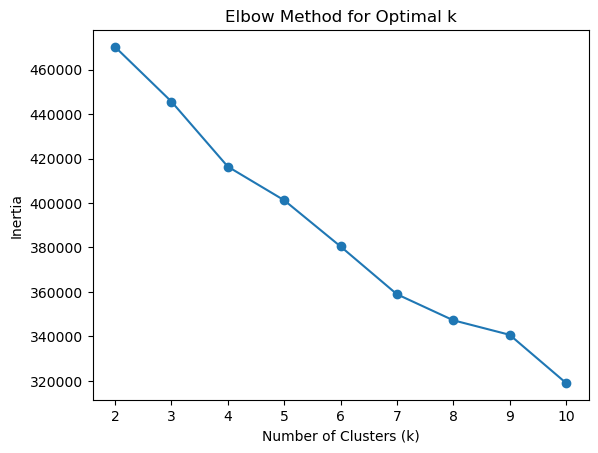

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### Based on this plot, the "elbow" appears to be around k=4 or k=5. This suggests that using 4 or 5 clusters might be a good choice for the dataset, representing a reasonable trade-off between model complexity (more clusters) and explaining the variance within the data .

### Silhouette Score

In [6]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'k={k}, silhouette score={score:.3f}')



k=2, silhouette score=0.083
k=3, silhouette score=0.074
k=4, silhouette score=0.098
k=5, silhouette score=0.100
k=6, silhouette score=0.116
k=7, silhouette score=0.133
k=8, silhouette score=0.135
k=9, silhouette score=0.120
k=10, silhouette score=0.140


#### The best Silhouette score  is at K=10 ,0.140. 

In [7]:
#Assigning the lables
kmeans = KMeans(n_clusters=10, random_state=42)
Music_new['cluster'] = kmeans.fit_predict(X_scaled)


In [8]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [9]:
Music_new['PCA1'] = X_pca[:, 0]
Music_new['PCA2'] = X_pca[:, 1]


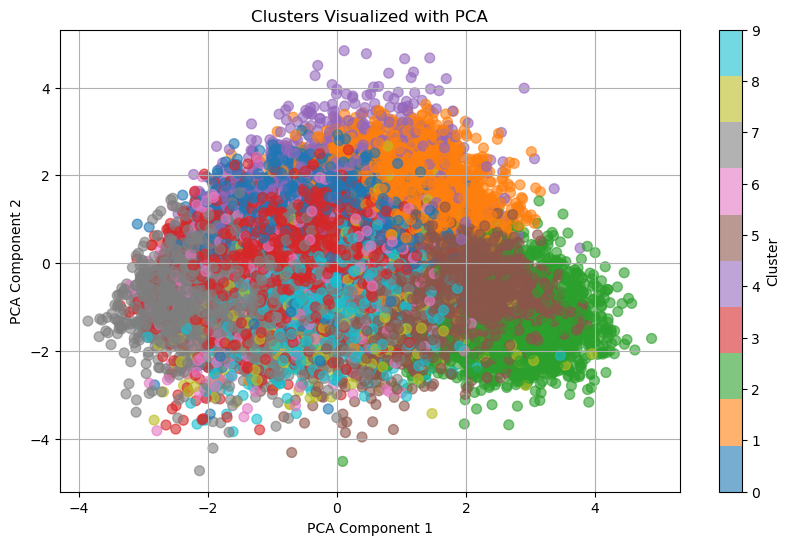

In [10]:
#Plotting the clusters:

plt.figure(figsize=(10, 6))
scatter = plt.scatter(Music_new['PCA1'], Music_new['PCA2'], 
                      c=Music_new['cluster'], cmap='tab10', alpha=0.6, s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualized with PCA')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


### Clusters like 2 (green) and 1 (orange) show distinct separation — suggesting those songs share strong common patterns.

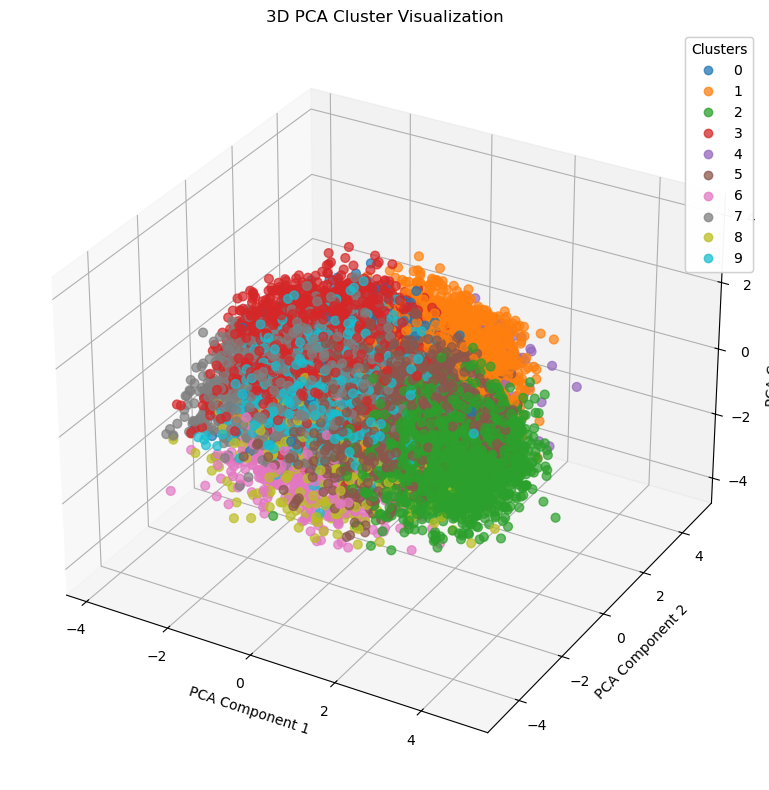

In [11]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Reduce to 3 components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Add to DataFrame (optional)
Music_new['PCA1'] = X_pca_3d[:, 0]
Music_new['PCA2'] = X_pca_3d[:, 1]
Music_new['PCA3'] = X_pca_3d[:, 2]

# 3D Scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    Music_new['PCA1'], Music_new['PCA2'], Music_new['PCA3'],
    c=Music_new['cluster'], cmap='tab10', s=40, alpha=0.7
)

ax.set_title('3D PCA Cluster Visualization')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()


### t-SNE for Music Dataset Visualization:

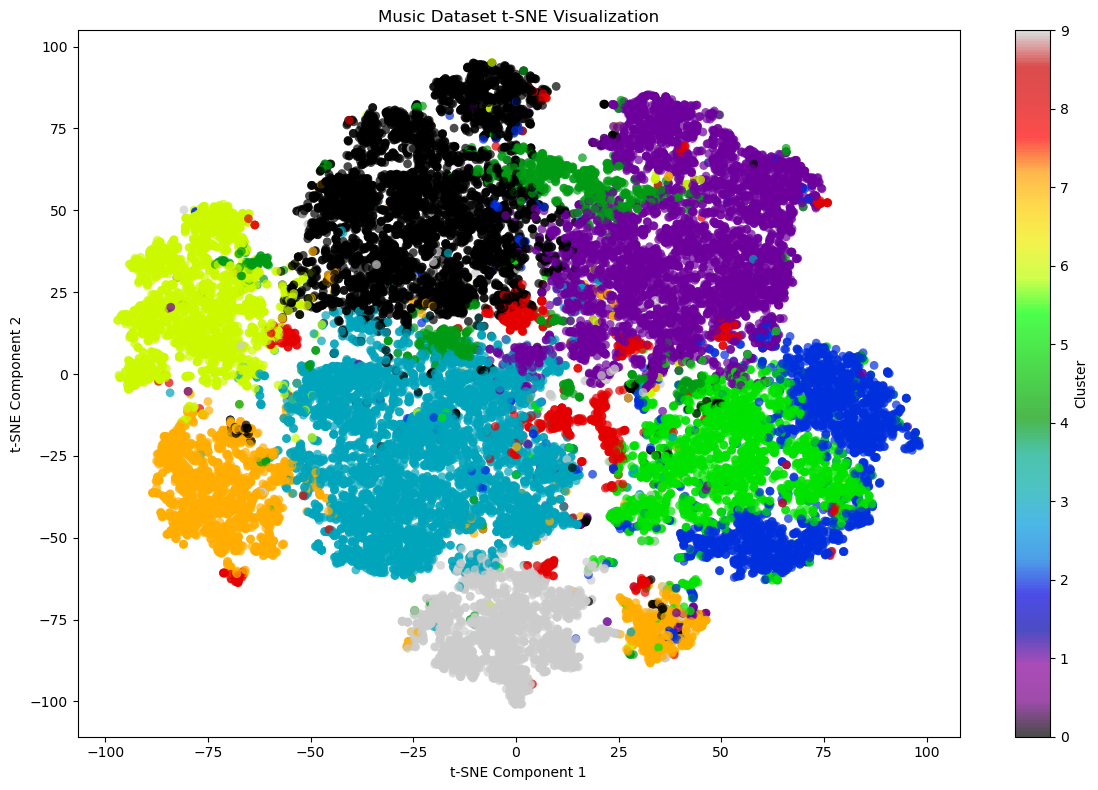

In [12]:
from sklearn.manifold import TSNE


# Run t-SNE (reduce dimensions to 2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    c=kmeans.labels_,  
    cmap='nipy_spectral', edgecolor='none',
    alpha=0.7, s=40
)
plt.colorbar(label='Cluster')
plt.title('Music Dataset t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()


### The points are colored according to cluster assignments. The color bar on the right indicates that the data has been grouped into 10 clusters (labeled 0 through 9). Each color corresponds to a specific cluster.Points that are close together in this 2D plot are likely similar to each other in the original high-dimensional music feature space. The different colored groups represent different types or categories of music identified by the clustering algorithm.


### New Sample Prediction Finally, apply your trained machine learning algorithm on the following test dataset, in order to generate cluster labels for each new sample.After generating these clusters, save these labels as a new column in your test dataset and save this subsequent dataframe for further analysis.